In [1]:
import pyforest
import warnings
from powerbiclient import Report, models
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('owid-covid-data.xlsx')
data.head()

<IPython.core.display.Javascript object>

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_cases,99800.0,1.136152e+06,7.737608e+06,1.000,1.396750e+03,1.461150e+04,1.557832e+05,1.914455e+08
new_cases,99797.0,6.081070e+03,3.776659e+04,-74347.000,2.000000e+00,7.500000e+01,8.310000e+02,9.059930e+05
new_cases_smoothed,98787.0,6.095576e+03,3.746018e+04,-6223.000,7.714000e+00,9.400000e+01,8.757855e+02,8.263681e+05
total_deaths,89535.0,3.031896e+04,1.809867e+05,1.000,5.700000e+01,4.290000e+02,4.137000e+03,4.118391e+06
new_deaths,89691.0,1.460304e+02,8.009255e+02,-1918.000,0.000000e+00,2.000000e+00,1.800000e+01,2.224900e+04
new_deaths_smoothed,98787.0,1.315264e+02,7.415312e+02,-232.143,0.000000e+00,1.429000e+00,1.457100e+01,1.473600e+04
total_cases_per_million,99270.0,1.402795e+04,2.539098e+04,0.001,2.757722e+02,1.961498e+03,1.483313e+04,1.860998e+05
new_cases_per_million,99267.0,7.672582e+01,2.008496e+02,-2153.437,2.340000e-01,8.800000e+00,7.095800e+01,1.829367e+04
new_cases_smoothed_per_million,98262.0,7.687488e+01,1.587710e+02,-276.825,1.339000e+00,1.160850e+01,7.927425e+01,4.083500e+03
total_deaths_per_million,89018.0,3.067627e+02,5.482065e+02,0.001,8.464250e+00,5.540800e+01,3.390702e+02,5.921506e+03


In [4]:
## Columns in the Dataset

data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [5]:
data.isnull().sum()

iso_code                                      0
continent                                  4840
location                                      0
date                                          0
total_cases                                4107
new_cases                                  4110
new_cases_smoothed                         5120
total_deaths                              14372
new_deaths                                14216
new_deaths_smoothed                        5120
total_cases_per_million                    4637
new_cases_per_million                      4640
new_cases_smoothed_per_million             5645
total_deaths_per_million                  14889
new_deaths_per_million                    14733
new_deaths_smoothed_per_million            5645
reproduction_rate                         20200
icu_patients                              93182
icu_patients_per_million                  93182
hosp_patients                             90959
hosp_patients_per_million               

In [6]:
## Dropping columns

data = data.drop(columns = ['new_deaths_smoothed', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence',
                    'iso_code', 'new_deaths', 'aged_65_older', 'total_cases_per_million', 'new_cases_per_million',
                     'new_cases_smoothed_per_million', 'total_deaths_per_million', 'total_deaths_per_million', 'new_deaths_per_million',
                     'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
                     'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 
                     'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests','total_tests','total_tests_per_thousand',
                     'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate',
                     'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated','people_fully_vaccinated',
                    'new_vaccinations','new_vaccinations_smoothed', 'total_vaccinations_per_hundred','people_vaccinated_per_hundred',
                     'people_fully_vaccinated_per_hundred', 'new_vaccinations_smoothed_per_million', 'stringency_index',
                    'population_density', 'extreme_poverty', 'female_smokers', 'male_smokers',
                    'handwashing_facilities', 'hospital_beds_per_thousand','life_expectancy', 'human_development_index',
                     'excess_mortality', 'aged_70_older', 'new_cases_smoothed', 'gdp_per_capita'])

In [7]:
data

,continent,location,date,total_cases,new_cases,total_deaths,population,median_age
0,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,38928341.0,18.6
1,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,38928341.0,18.6
2,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,38928341.0,18.6
3,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,38928341.0,18.6
4,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,38928341.0,18.6
...,...,...,...,...,...,...,...,...
103902,Africa,Zimbabwe,2021-07-16,81168.0,2296.0,2520.0,14862927.0,19.6
103903,Africa,Zimbabwe,2021-07-17,82613.0,1445.0,2588.0,14862927.0,19.6
103904,Africa,Zimbabwe,2021-07-18,83619.0,1006.0,2622.0,14862927.0,19.6
103905,Africa,Zimbabwe,2021-07-19,85732.0,2113.0,2697.0,14862927.0,19.6


In [8]:
## Dropping null values

data = data.dropna(axis = 0, how ='any').reset_index(drop = True)
data

,continent,location,date,total_cases,new_cases,total_deaths,population,median_age
0,Asia,Afghanistan,2020-03-22,34.0,4.0,1.0,38928341.0,18.6
1,Asia,Afghanistan,2020-03-23,41.0,7.0,1.0,38928341.0,18.6
2,Asia,Afghanistan,2020-03-24,43.0,2.0,1.0,38928341.0,18.6
3,Asia,Afghanistan,2020-03-25,76.0,33.0,2.0,38928341.0,18.6
4,Asia,Afghanistan,2020-03-26,80.0,4.0,3.0,38928341.0,18.6
...,...,...,...,...,...,...,...,...
82394,Africa,Zimbabwe,2021-07-16,81168.0,2296.0,2520.0,14862927.0,19.6
82395,Africa,Zimbabwe,2021-07-17,82613.0,1445.0,2588.0,14862927.0,19.6
82396,Africa,Zimbabwe,2021-07-18,83619.0,1006.0,2622.0,14862927.0,19.6
82397,Africa,Zimbabwe,2021-07-19,85732.0,2113.0,2697.0,14862927.0,19.6


In [9]:
## Confirming if the null values have been removed

data.isnull().sum()

continent       0
location        0
date            0
total_cases     0
new_cases       0
total_deaths    0
population      0
median_age      0
dtype: int64

In [10]:
## Checking the column Datatypes

data.dtypes

continent        object
location         object
date             object
total_cases     float64
new_cases       float64
total_deaths    float64
population      float64
median_age      float64
dtype: object

In [11]:
## Converting the date column to date

data['date'] = pd.to_datetime(data['date'])

<IPython.core.display.Javascript object>

In [12]:
data.dtypes

continent               object
location                object
date            datetime64[ns]
total_cases            float64
new_cases              float64
total_deaths           float64
population             float64
median_age             float64
dtype: object

In [13]:
data['continent'].value_counts()

Africa           24589
Asia             21113
Europe           19687
North America     9365
South America     5856
Oceania           1789
Name: continent, dtype: int64

In [21]:
## Aggregating rows by continent

gk_data = data.groupby("location").sum()
gk_data.head()

,total_cases,new_cases,total_deaths,population,median_age
location,,,,,
Afghanistan,22637801.0,142384.0,900638.0,1.891917e+10,9039.6
Albania,26658992.0,132730.0,503580.0,1.430267e+09,18886.0
Algeria,34902897.0,155764.0,1026051.0,2.175012e+10,14433.6
Angola,6742498.0,41056.0,161916.0,1.574294e+10,8047.2
Antigua and Barbuda,209469.0,1260.0,6243.0,4.602616e+07,15087.0


In [16]:
## Correlation coefficient 

gk_data.corr()

,total_cases,new_cases,total_deaths,population,median_age
total_cases,1.000000,0.984060,0.936929,0.452117,0.176720
new_cases,0.984060,1.000000,0.904603,0.519633,0.172065
total_deaths,0.936929,0.904603,1.000000,0.357040,0.200245
population,0.452117,0.519633,0.357040,1.000000,0.096370
median_age,0.176720,0.172065,0.200245,0.096370,1.000000


In [17]:
## United States has the most cases

d1 = pd.DataFrame(data.groupby
             ("location")["total_cases"].max().sort_values(ascending = False).head(10))
d1

<IPython.core.display.Javascript object>

,total_cases
location,
United States,34174774.0
India,31216337.0
Brazil,19419437.0
France,5978650.0
Russia,5931925.0
Turkey,5546166.0
United Kingdom,5542635.0
Argentina,4784219.0
Colombia,4668750.0


In [40]:
## United States has the most death cases

d3 = pd.DataFrame(data.groupby
             ("location")["total_deaths"].max().sort_values(ascending = False).head(10))
d3

<IPython.core.display.Javascript object>

,total_deaths
location,
United States,609529.0
Brazil,544180.0
India,418480.0
Mexico,236810.0
Peru,195243.0
Russia,147457.0
United Kingdom,129109.0
Italy,127884.0
Colombia,117131.0


In [37]:
## Total death by continent

data.groupby('continent')['total_deaths'].sum()

continent
Africa            30097813.0
Asia             144710290.0
Europe           247709873.0
North America    225343440.0
Oceania             346841.0
South America    199871624.0
Name: total_deaths, dtype: float64

In [39]:
data['total_deaths'].sum()

848079881.0

<IPython.core.display.Javascript object>

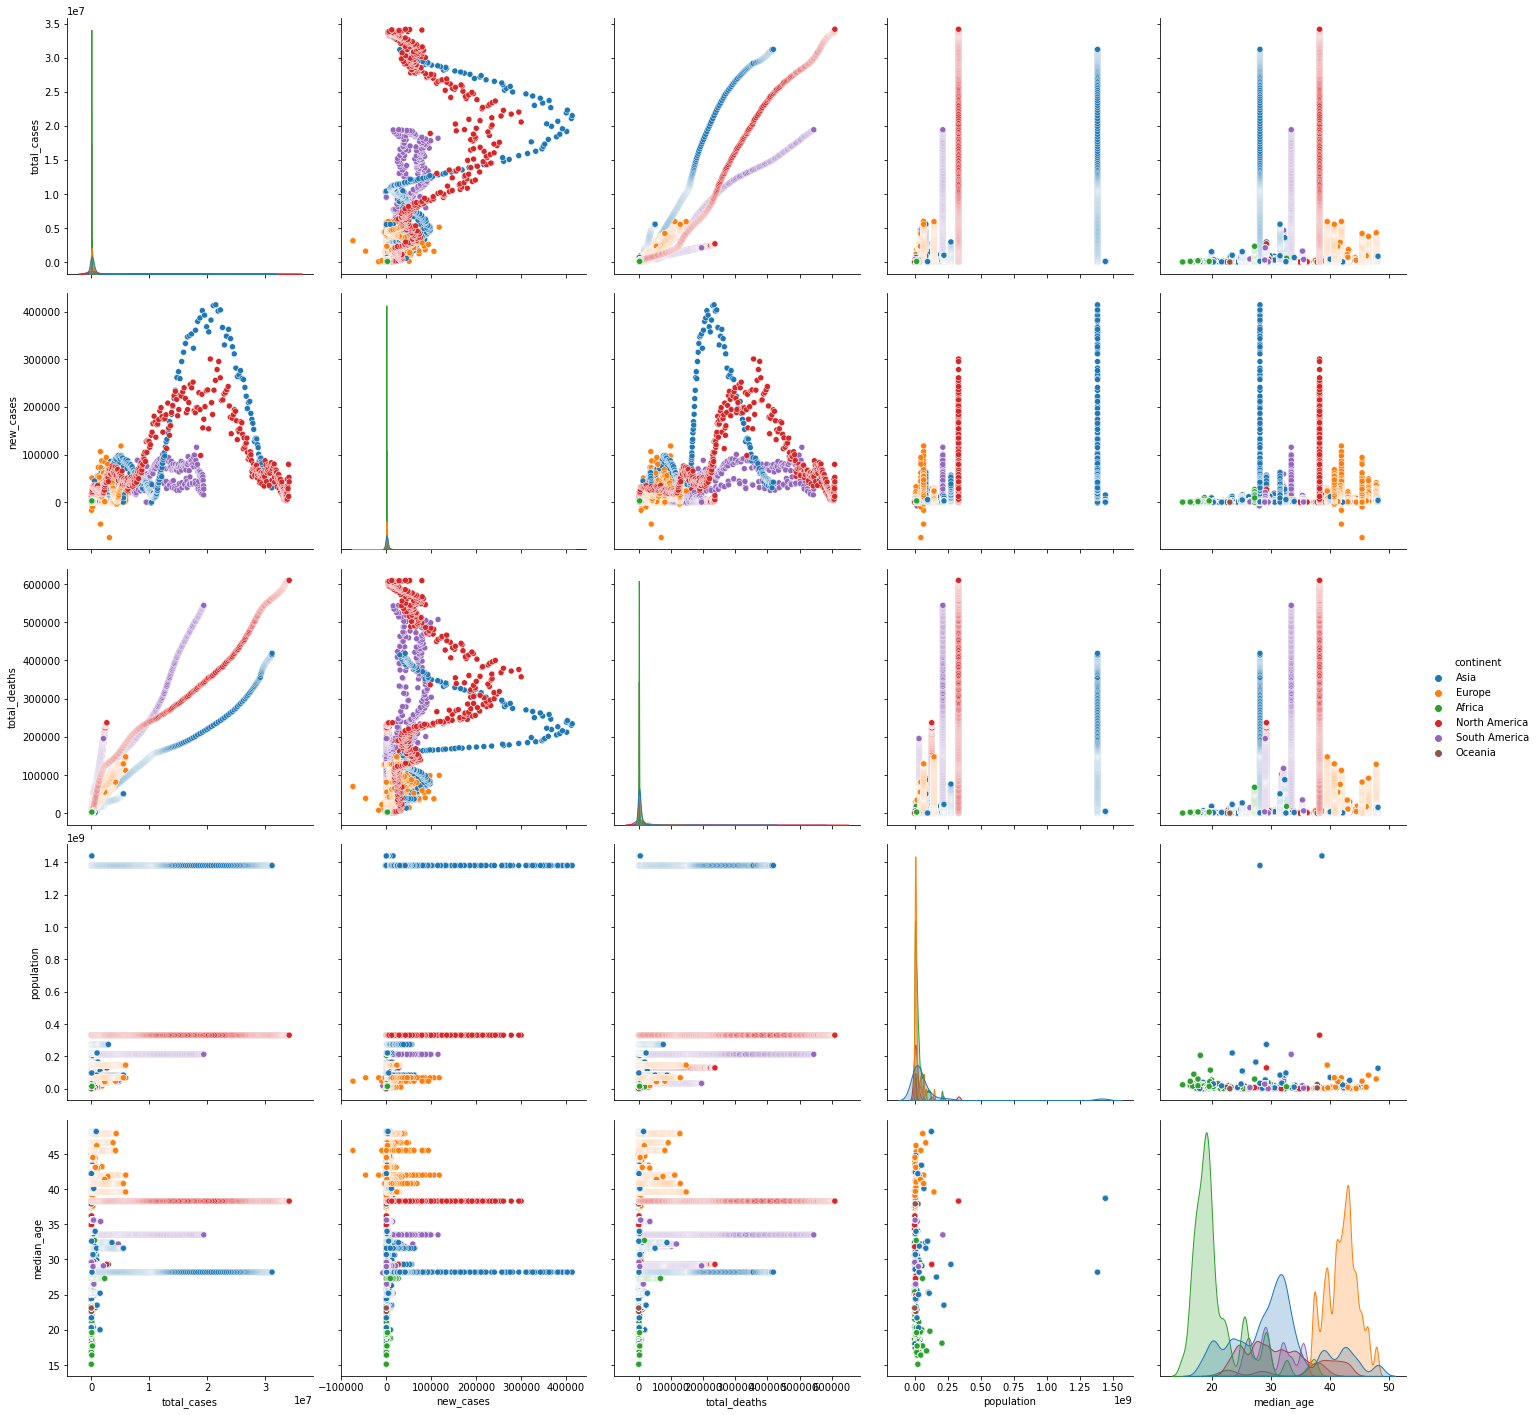

In [43]:
sns.pairplot(data = data, hue = 'continent', size = 4)

In [50]:
from powerbiclient.authentication import DeviceCodeLoginAuthentication

device_auth = DeviceCodeLoginAuthentication()

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code D9P256X4E to authenticate.

Device flow authentication successfully completed.
You are now logged in.


In [49]:
## Saving the cleaned Data

import openpyxl
data.to_excel('covid19.xlsx')